# Forecast & Predictions (Machine Learning) Project 

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

## Plan of Research:

<div id="plan"></div>

1. [Download the data](#part1)
2. Carry out [exploratory data analysis](#part2) (EDA) [conclusions](#part2_c)
3. [Build a model](#part3) to predict user churn  [conclusions](#part3_c)
4. [Create user clusters](#part4)  [conclusions](#part4_c)
5. Come up with [conclusions and basic recommendations](#part5) on working with customers

<a id="part1"></a>
### Download the data

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#creating variable to store data path
data_path = r'C:\Users\Sofia\datasets\gym_churn_us.csv'

In [5]:
#downloading the dataset
data = pd.read_csv(data_path)

In [6]:
#checking general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
#changing column names to lowercase
data.columns = data.columns.str.lower()

In [8]:
#checking for duplicated rows
data[data.duplicated()].empty

True

In [9]:
data.sample(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3663,1,1,0,0,1,12,1,27,334.472656,7.0,0,3.684876,3.672933,0
55,0,1,1,1,0,1,0,30,194.669178,1.0,4,1.893015,1.900943,0
207,1,1,1,0,1,1,0,31,180.131372,1.0,5,3.807164,3.747252,0
2261,1,1,1,1,1,12,1,32,265.407290,12.0,5,1.469406,1.537555,0
2300,1,1,1,1,1,1,1,26,50.394566,1.0,4,1.178914,1.081342,0
1017,0,0,0,0,1,12,1,24,274.561499,7.0,15,1.209651,1.240502,0
613,1,0,0,0,1,1,0,27,145.590959,1.0,17,2.387168,2.447191,0
3985,0,1,1,1,1,12,1,29,13.328843,9.0,2,2.186940,2.351317,0
3552,0,1,1,1,1,12,1,34,16.607012,12.0,8,2.009080,1.926014,0
3726,0,1,1,0,1,6,0,34,242.938773,6.0,5,3.915676,3.895960,0


<a id="part2"></a>
### Carry out exploratory data analysis (EDA)

In [10]:
#study the mean values and standard deviation
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [11]:
#study the mean feature parameters for those who stayed and for those who left
data.groupby('churn').agg({i:'mean' for i in data.columns})

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1


In [12]:
#creating a dataframe copy for plotting graphs
df = data.copy()
df['churn'] = df['churn'].replace({0:'Stayed', 1:'Left'})

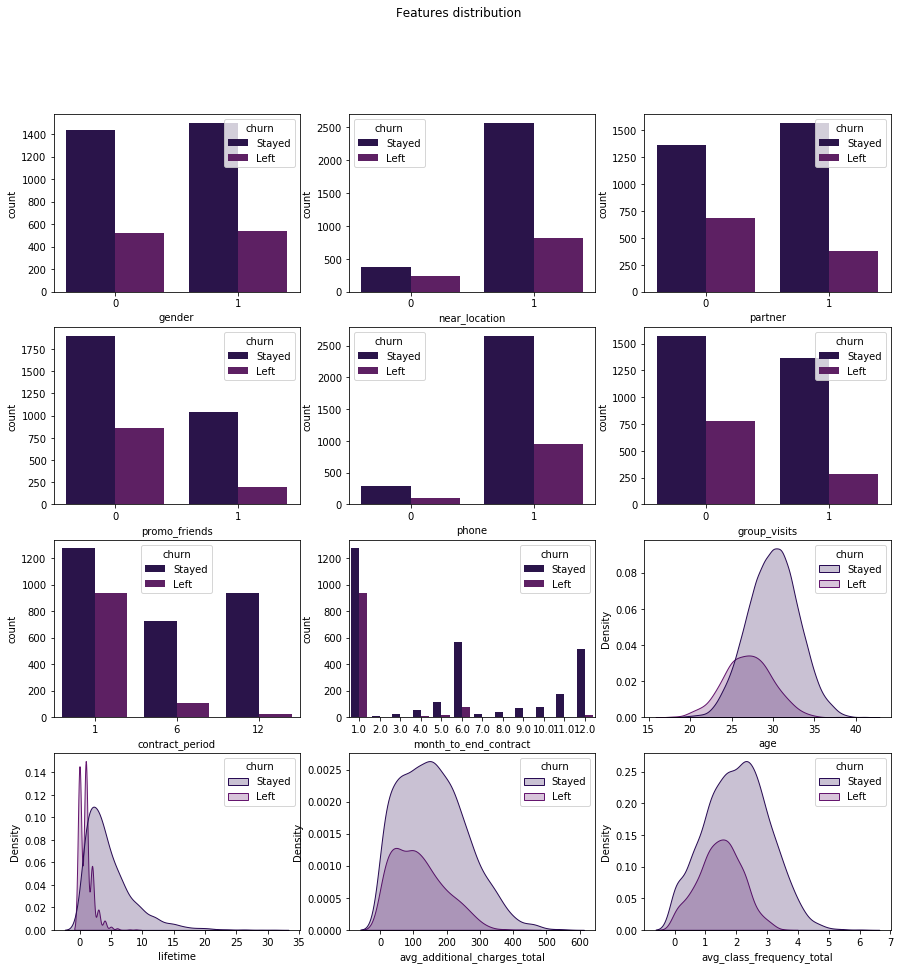

In [13]:
#old-fashioned manual visualization

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15)) 
fig.suptitle('Features distribution')
sns.set_palette('inferno')

sns.countplot(ax=axes[0, 0], x='gender', data=df, hue='churn')
sns.countplot(ax=axes[0, 1], x='near_location', data=df, hue='churn')
sns.countplot(ax=axes[0, 2], x='partner', data=df, hue='churn')
sns.countplot(ax=axes[1, 0], x='promo_friends', data=df, hue='churn')
sns.countplot(ax=axes[1, 1], x='phone', data=df, hue='churn')
sns.countplot(ax=axes[1, 2], x='group_visits', data=df, hue='churn')
sns.countplot(ax=axes[2, 0], x='contract_period', data=df, hue='churn')
sns.countplot(ax=axes[2, 1], x='month_to_end_contract', data=df, hue='churn')
sns.kdeplot(ax=axes[2, 2], x="age", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[3, 0], x="lifetime", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[3, 1], x="avg_additional_charges_total", data=df, hue="churn", shade=True)
sns.kdeplot(ax=axes[3, 2], x="avg_class_frequency_total", data=df, hue="churn", shade=True)

fig.show()

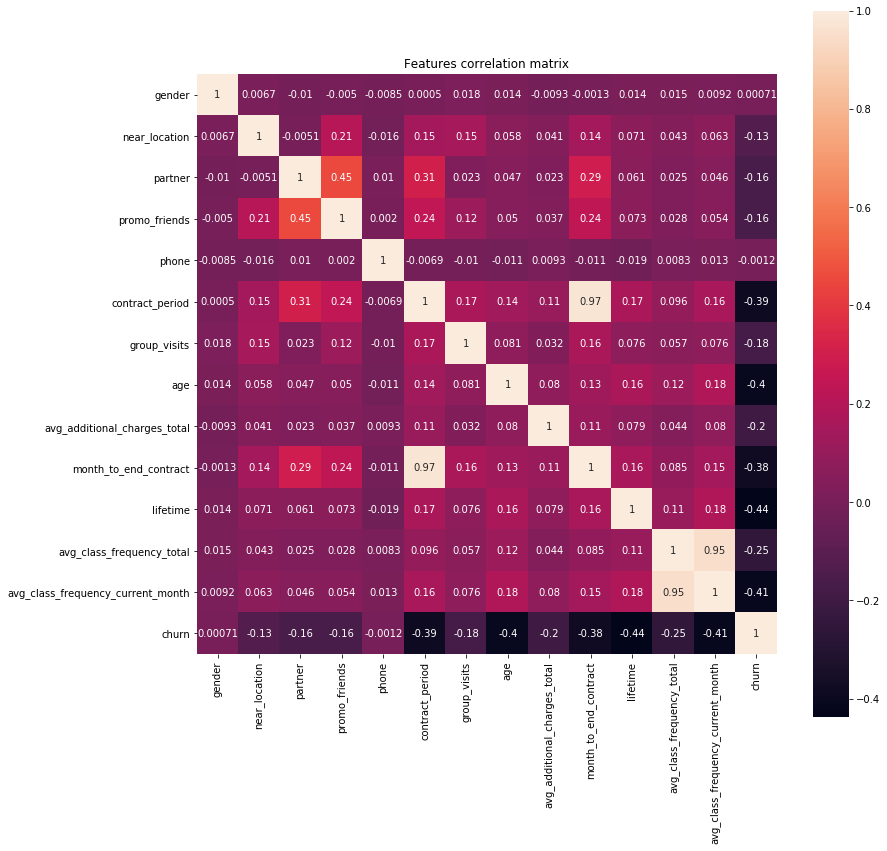

In [14]:
#building a correlation matrix
corr_m = data.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_m, annot=True, square=True)
plt.title('Features correlation matrix')
plt.show()

<a id="part2_c"></a>

Our dataset doesn't contain nor missing values, nor duplicates. We checked mean values and standard deviation for our DataFrame, 7 out of 14 columns contain Boolean values, distribution of other 7 columns look fair.

By checking mean feature values for stayed/left users we see that some features have similar share in those groups (gender, for instance), while some features' values differ a lot (contract period, for instance).

After we plot distribution graphs we can see some patterns ourselves: for example, gender doesn't matter; churn rate is very high for users with one-month contract; we also see that mostly users leave after first or second month.

Correlation matrix gives us more information: for the churn parameter we're interested in, there are no strong positive correlation coefficients. Features with strongest negative correlations with the churn parameter are: 'age', 'lifetime', 
'contract_period', 'month_to_end_contract' and 'avg_class_frecuency_current_month'.

We also see two pair of features with strong mutual correlation: 'contract_period' & 'month_to_end_contract', and 'avg_class_frequency_current_month' & 'avg_class_frequency_total', so we might want to remove them later.

In [15]:
#dropping features with too high mutual coefficient
data = data.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)

<a id="part3"></a>
### Build a model to predict user churn

In [16]:
#dividing the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [17]:
#dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [18]:
#creating a StandardScaler object and applying it to the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

#applying standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

In [19]:
#defining list of models we would like to check
models = [LogisticRegression(random_state=0), RandomForestClassifier(n_estimators=100, random_state=0)]

In [20]:
#creating a function for training model, making prediction and printing out metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred),
                                                                  recall_score(y_test, y_pred)))

In [21]:
#let's do it!
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:0.91 Precision:0.83 Recall:0.83
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy:0.89 Precision:0.81 Recall:0.79


<a id="part3_c"></a>

First of all, we're going to solve a binary classification task here (we want to predict if the user will stay or leave, 0 or 1), so we will start with simple LogisticRegression model. Side-by-side we would like to check more powerful algorithm, so we will go with RandomForestClassifier. 
We divided the dataset we had into train and validation(test) data with proportion of 80/20. This is a simpler approach, but it's good enough for us at this point. After that we standardized feature matrices of both train and test data, and trained our models, made predictions and printed out important metrics, such as accuracy, precision and recall scores.

<a id="part4"></a>
### Create user clusters

In [22]:
sc = StandardScaler()
X_sc = sc.fit_transform(data)

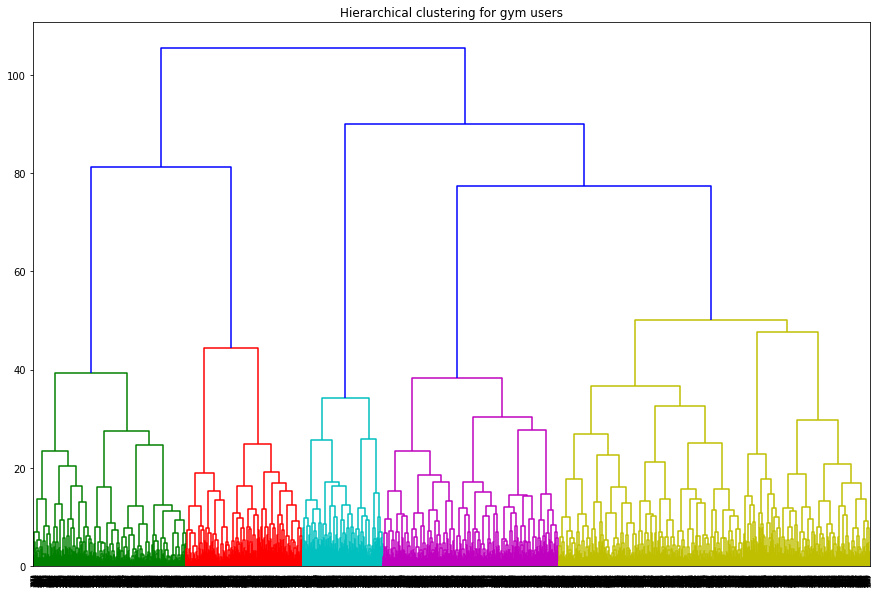

In [23]:
#visualizing hierarchy
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym users')
plt.show() 

In [24]:
#defining the k_means model with 5 clusters
km = KMeans(n_clusters=5, random_state=0)

In [25]:
# predict the clusters for observations (0 to 4)
labels = km.fit_predict(X_sc)

In [26]:
#storing cluster labels in the field of our dataset
data['cluster_km'] = labels

In [27]:
#studyinf the mean feature parameters for clusters
data.groupby('cluster_km').agg({i:'mean' for i in data.columns})

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
cluster_km,,,,,,,,,,,,,
0,0.510316,1.000000,0.327373,0.220083,1,1.698762,0.286107,26.899587,114.139664,0.973865,1.473279,0.991747,0
1,0.512730,0.999293,0.336634,0.000000,1,5.144272,0.458274,30.045262,161.669017,4.712164,2.045793,0.000707,1
2,0.507659,0.993435,0.851204,1.000000,1,7.311816,0.541575,29.912473,157.562216,4.733042,2.023697,0.012035,2
3,0.499106,0.000000,0.488372,0.075134,1,3.021467,0.237925,28.708408,136.885800,3.007156,1.765421,0.402504,3
4,0.523316,0.862694,0.471503,0.305699,0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839,4


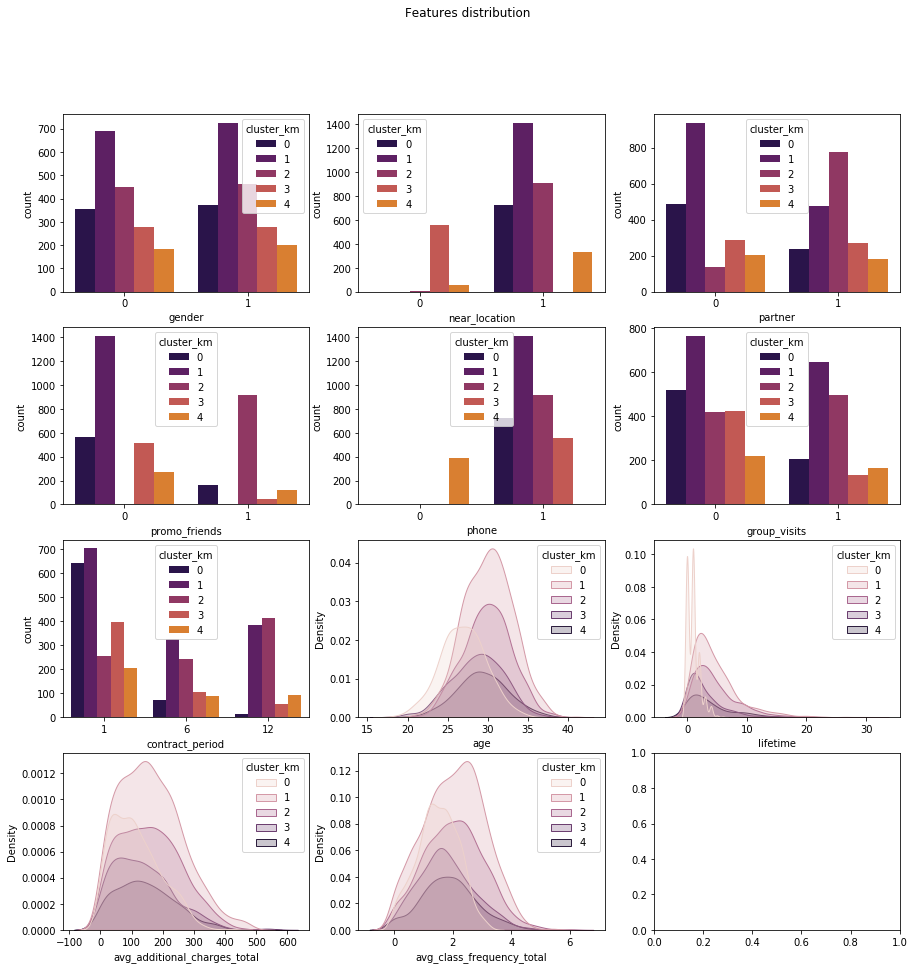

In [28]:
#once again manual visualization for clusters' features' distribution

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15)) 
fig.suptitle('Features distribution')
sns.set_palette('inferno')

sns.countplot(ax=axes[0, 0], x='gender', data=data, hue='cluster_km')
sns.countplot(ax=axes[0, 1], x='near_location', data=data, hue='cluster_km')
sns.countplot(ax=axes[0, 2], x='partner', data=data, hue='cluster_km')
sns.countplot(ax=axes[1, 0], x='promo_friends', data=data, hue='cluster_km')
sns.countplot(ax=axes[1, 1], x='phone', data=data, hue='cluster_km')
sns.countplot(ax=axes[1, 2], x='group_visits', data=data, hue='cluster_km')
sns.countplot(ax=axes[2, 0], x='contract_period', data=data, hue='cluster_km')
sns.kdeplot(ax=axes[2, 1], x="age", data=data, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[2, 2], x="lifetime", data=data, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[3, 0], x="avg_additional_charges_total", data=data, hue="cluster_km", shade=True)
sns.kdeplot(ax=axes[3, 1], x="avg_class_frequency_total", data=data, hue="cluster_km", shade=True)

fig.show()

In [29]:
churn_rate = data.groupby(['cluster_km']).agg({'age':'count', 'churn':'sum'}).reset_index()
churn_rate.columns = ['cluster', 'total_users', 'churn_users']
churn_rate['churn_rate, %'] = ((churn_rate['churn_users'] / churn_rate['total_users']) * 100).round(2)
churn_rate

,cluster,total_users,churn_users,"churn_rate, %"
0,0,727,721,99.17
1,1,1414,1,0.07
2,2,914,11,1.20
3,3,559,225,40.25
4,4,386,103,26.68


<a id="part4_c"></a>

First of all we standardized our data. Then we used agglomerative hierarchy clustering to plot dendrogram to see how many clusters we have. On the dendrogram we see it's clearly 5 clusters.
Then we used K Means model to divide our users into 5 clusters.

When we check mean feature values for clusters, we see that some features' parameters differ dramatically for different clusters: for example, 'near_location', 'contract_period'. For some features there's also significant difference for clusters: for instance, 'partner', 'promo_friends', 'group_visits'; and some features' mean values are practically the same for all clusters, like 'age and 'gender'.

We can see it more clearly on features' distribution graph - 'near_location' and 'contract_period' are important parameters for dividing into clusters.

Obviously, churn rate differs a lot for different clusters, so let's take a closer look.

Cluster 0 stands out from others cause it contains people not living close to the gym. Users from this cluster also tend to sign short-term contracts (1 or 6 months), they mostly don't come from friends invitations and mostly don't come to group activities. Churn rate for them is pretty high - 45%.

Cluster 1 stands out in terms of being a partner of the gym - i.e. most pf them are employees of a partner company. They tend to sign long-term contracts (mostly 12 months, sometimes 6), and they tend to come to classes more often, than the other groups (2.78 visits per week). Churn rate for this group is very low - only 0.78%.

Cluster 2 doesn't stand out that much on the first glance. Users from this cluster live close to the gym, tend to sign short-term contracts and to come not that often - 1.44 visits per week on average. They rarely come to group classes and spend less money on additional services. In our dataset we see that they have a significant drop in visits frequency the month before thy left - from 1.44 to 1.03 visits per week on average. This means such a drop in visit frequency should be a red light for us, because 96% of such users won't come back.

Cluster 3 is similar to cluster 2 in most features - they live close, sign short-term contracts, but they tend to come more often (2.2 visits per week) and spend more money on additional services. For them, churn rate is very low - 0.34%.

Cluster 4 is similar to cluster 1 - they live close, tend to be employees of partner companies, tend to sign long-term contracts. The difference here is the visit frequency: for this cluster it's the lowest - less than 1 visit a week on average. Churn rate for this group is surprisingly low - only 2.47%.

Taking all that into account, we see that clusters 1, 3, and 4 are loyal, in cluster 45% leave, and in cluster 2 96% leave. 

<a id="part5"></a>
### Come up with conclusions and basic recommendations on working with customers

Taking all our conclusions into account, we can say that first of all we should pay attention to customer's visit frequency, because significant drop in visit frequency warns us that the user is leaving, so it's very important to recognize such possibility while customer's still here - after all, keeping the customer is easier than attracting a new one.

I would recommend to make a research (customer interviews, probably) to find out why people leave shortly after they come? Is this a New Year's influence, and all these people just stop doing sports at all, or maybe something is not quite right with this specific gym? Finding answers can help us build more detailed strategy for keeping customers loyal.

We also see that another factor with pretty high impact on churn rate is the distance from the gym to the customer's home. Those who do not live close, tend to leave soon (almost half of them leaves, and thy also tend to come less frequent, and, therefore, spend less money on additional services). What can we do with it? Well, not much aside from expanding the chain, I guess, but we also could send motivational messages from time to time, reminding that a way to the gym is a part of a workout.

In general, people who are employees of the partner companies tend to be loyal no matter how often they visit, so this is a great direction to bring more loyal customers. Being brought by a friend also lowers the churn possibility, so I would recommend to invest more in these channels of attracting new users.